In [1]:
import numpy as np

actions = [ 'annyeonghaseyo', 'sueo', 'jaemiissda', 'yereobun', 'modu', 'jeongmal', 'sugo']

data = np.concatenate([
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_annyeonghaseyo_1661781114.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_sueo_1661781114.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_jaemiissda_1661781348.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_yeoreobun_1661781348.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_modu_1661781348.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_jeongmal_1661781114.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/datasets/seq_sugo_1661781620.npy')
])

data.shape

(2294, 30, 100)

In [2]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2294, 30, 99)
(2294,)


In [3]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2294, 7)

In [4]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2064, 30, 99) (2064, 7)
(230, 30, 99) (230, 7)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]), # node 개수 64개
    Dense(32, activation='relu'), # node 개수 32개
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # loss='categorical_crossentropy -> 3개의 action 중 어떤 건지 모델에게 추론하게 함
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 44,295
Trainable params: 44,295
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/last_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)


Epoch 1/200
63/65 [============================>.] - ETA: 0s - loss: 57.6711 - acc: 0.4246
Epoch 1: val_acc improved from -inf to 0.64783, saving model to models\last_model.h5
65/65 [==============================] - 4s 16ms/step - loss: 56.5728 - acc: 0.4317 - val_loss: 6.7549 - val_acc: 0.6478 - lr: 0.0010
Epoch 2/200
60/65 [==========================>...] - ETA: 0s - loss: 5.4922 - acc: 0.7109
Epoch 2: val_acc improved from 0.64783 to 0.72609, saving model to models\last_model.h5
65/65 [==============================] - 1s 12ms/step - loss: 5.4215 - acc: 0.7137 - val_loss: 3.8930 - val_acc: 0.7261 - lr: 0.0010
Epoch 3/200
64/65 [============================>.] - ETA: 0s - loss: 2.8020 - acc: 0.7734
Epoch 3: val_acc improved from 0.72609 to 0.73478, saving model to models\last_model.h5
65/65 [==============================] - 1s 12ms/step - loss: 2.8025 - acc: 0.7723 - val_loss: 3.3304 - val_acc: 0.7348 - lr: 0.0010
Epoch 4/200
61/65 [===========================>..] - ETA: 0s - loss:

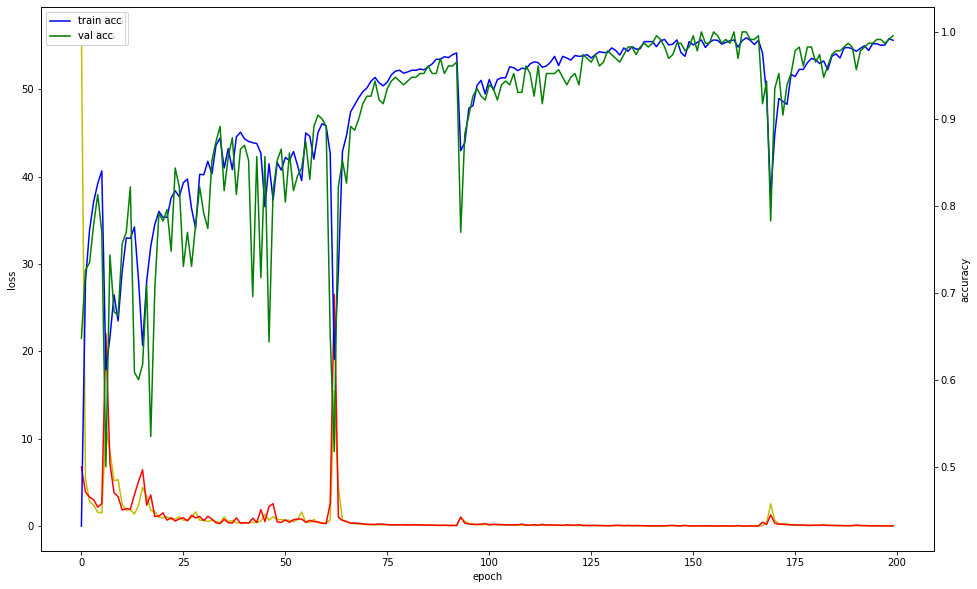

In [7]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()